# CUSTOMER CHRUN PREDICTION 

The objective of this analysis is to understand customer churn behavior and quantify its business impact using Exploratory Data Analysis (EDA) and predictive modeling.

This study aims to answer the following key business questions:

* Who are the customers most likely to churn?
* Why are they churning?
* What is the potential revenue loss due to churn?

### Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing & Data Manipulation

In [2]:
df=pd.read_csv('/kaggle/input/datasets/blastchar/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df = df.drop('customerID', axis=1)

In [5]:
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.loc[pd.isna(df['TotalCharges']), :].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [8]:
df[pd.isna(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df=df.dropna()

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Exploratory Data Analysis (EDA)

In [11]:
(df['Churn'].value_counts(normalize=True) * 100).round(1).astype(str) + '%'

Churn
No     73.4%
Yes    26.6%
Name: proportion, dtype: object

Based on the analysis, 73.4% of customers did not churn, while 26.6% of customers churned. This indicates that although the majority of customers remain with the company, a significant portion (approximately one-quarter) have discontinued the service, highlighting the importance of developing an effective customer churn prediction model to identify and retain at-risk customers.

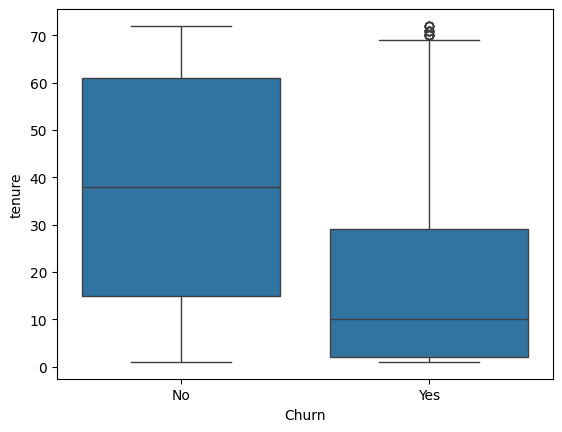

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

Churn is heavily concentrated in lower tenure, it's indicating that the first few months of customer experience ar the most volatile.

In [13]:
Mtm_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
print((Mtm_churn*100).round(1).astype(str) + '%')

Churn              No    Yes
Contract                    
Month-to-month  57.3%  42.7%
One year        88.7%  11.3%
Two year        97.2%   2.8%


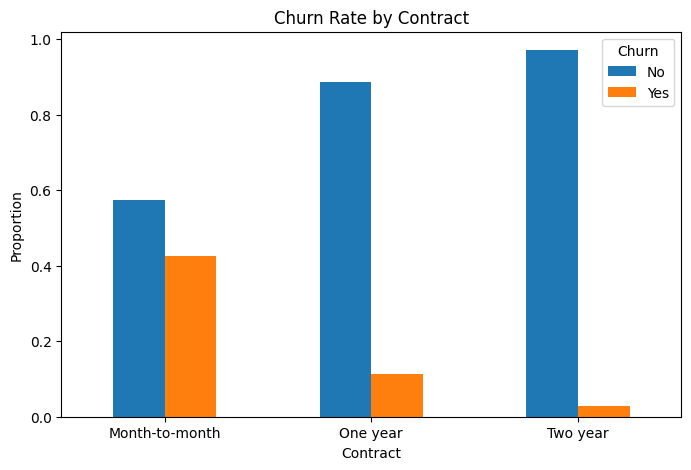

In [14]:
Mtm_churn.plot(kind='bar', figsize=(8,5))

plt.title("Churn Rate by Contract")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

Customers on month-to-month contracts exhibit the highest churn rate at over 40%, whereas those on long-term two-year contracts remain significantly more loyal. 

In [15]:
is_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
print((is_churn*100).round(1).astype(str) + '%')

Churn               No    Yes
InternetService              
DSL              81.0%  19.0%
Fiber optic      58.1%  41.9%
No               92.6%   7.4%


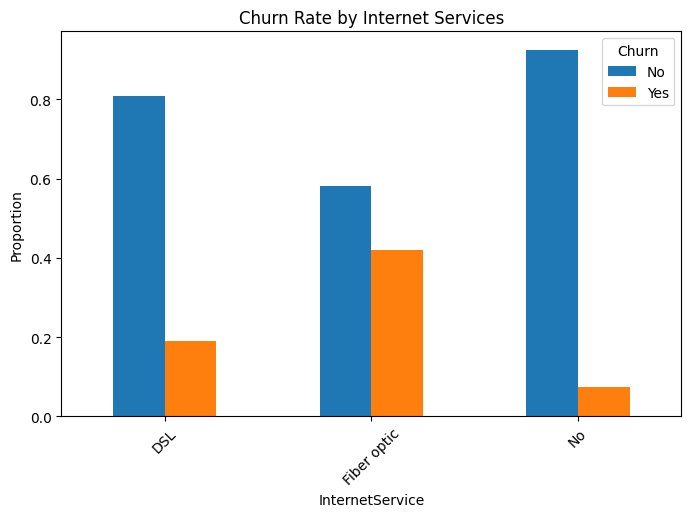

In [16]:
is_churn.plot(kind='bar', figsize=(8,5))

plt.title("Churn Rate by Internet Services")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

Fiber optic users surprisingly show the highest propensity to leave the service compared to DSL or non-internet users, pointing toward potential dissatisfaction with premium service pricing or reliability.

In [17]:
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')
print((payment_churn*100).round(1).astype(str) + '%')

Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.3%  16.7%
Credit card (automatic)    84.7%  15.3%
Electronic check           54.7%  45.3%
Mailed check               80.8%  19.2%


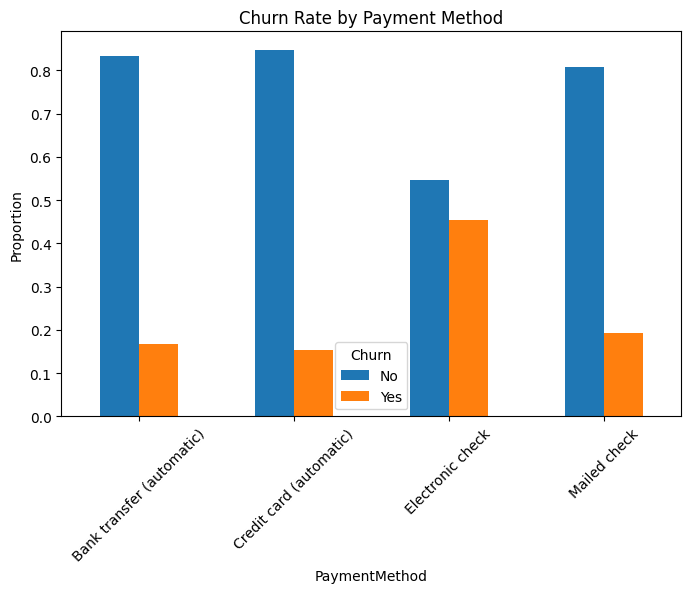

In [18]:
payment_churn.plot(kind='bar', figsize=(8,5))

plt.title("Churn Rate by Payment Method")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()

Electronic check payment method stands out as a major red flag for attrition, as these customers churn at nearly double the rate of those enrolled in automatic billing systems.

### Customer Churn Prediction Using Logisctic Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0,12,24,48,72],
                            labels=['0-1yr','1-2yr','2-4yr','4-6yr'])

In [20]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

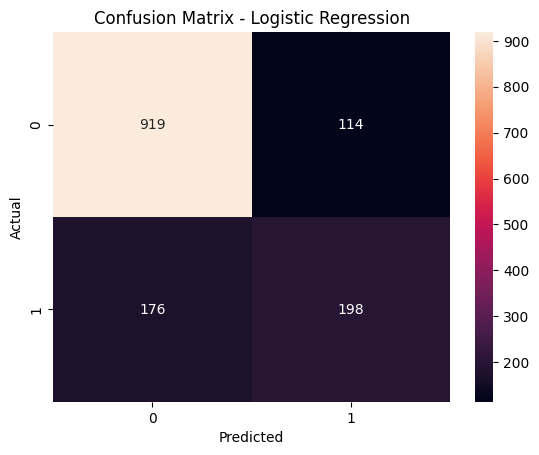

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

ROC AUC: 0.8347694529717193


In [24]:
cm_log = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure()
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

In [25]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).head(10)

InternetService_Fiber optic       0.703264
TotalCharges                      0.309320
StreamingTV_Yes                   0.250505
StreamingMovies_Yes               0.233280
MultipleLines_Yes                 0.228524
tenure_group_4-6yr                0.226413
PaymentMethod_Electronic check    0.176526
PaperlessBilling_Yes              0.144099
DeviceProtection_Yes              0.079483
SeniorCitizen                     0.075494
dtype: float64

In [26]:
test_result = X_test.copy()
test_result['churn_prob'] = y_proba
test_result['MonthlyCharges'] = df.loc[X_test.index, 'MonthlyCharges']

In [27]:
test_result['expected_loss'] = test_result['churn_prob'] * test_result['MonthlyCharges']

total_risk = test_result['expected_loss'].sum()
avg_risk = test_result['expected_loss'].mean()

print(f"""
Total Monthly Revenue at Risk : ${total_risk:,.0f}
Average Risk per Customer     : ${avg_risk:,.0f}
""")


Total Monthly Revenue at Risk : $28,325
Average Risk per Customer     : $20



# 📊 Business Insights & Findings
Who Are the Customers Most Likely to Churn?

Based on EDA and model results, customers with the highest churn probability are those on Month-to-Month contracts, customers with short tenure, and customers with higher monthly charges.

The churn rate for Month-to-Month customers is significantly higher compared to customers with One-Year or Two-Year contracts. The predictive model also confirms that contract type, tenure, and monthly charges are among the strongest churn predictors.

This indicates that customers without long-term commitment and with higher service costs are more likely to leave.


Why Are They Churning?

The main drivers of churn identified from the analysis are:

* Lack of long-term contract commitment
1. Price sensitivity (higher monthly charges)
1. Early-stage customer lifecycle (low tenure)

Customers on flexible contracts can easily switch providers, and customers paying higher fees may be more sensitive to price or perceived service value.

What Is the Potential Revenue Loss?

Based on the calculation performed in this notebook, the total potential revenue loss from customers who churn equals:

* Total Monthly Revenue at Risk : $28,325

* Average Risk per Customer     : $20

This represents the cumulative monthly revenue at risk from churned customers.

The analysis shows that revenue risk is not only driven by the number of customers who churn, but also by the monthly charges associated with those customers.